# CREDIT RISK ANALYSIS


This assignment aims to give an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that I have learnt in the EDA module, Develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- **The client with payment difficulties**: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- **All other cases**: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- **Approved**: The Company has approved loan Application

- **Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- **Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

- **Unused offer**: Loan has been cancelled by the client but on different stages of the process.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Importing the required libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)  
pd.set_option('display.width', 1000)
sns.set(color_codes=True)

### Data Reading and Data Types

In [3]:
inp0 = pd.read_csv(r'C:\Users\Asus\Desktop\IIIT-B\Credit EDA Case Study\Dataset\application_data.csv')

In [4]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
inp0.shape

(307511, 122)

In [6]:
inp0.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Impute / Remove missing values 

Printing the null values count of application_data to get the idea about the  remaining missing values in data set.

In [7]:
null_values = round(inp0.isnull().sum() / inp0.shape[0] * 100,1).sort_values(ascending = False)

In [8]:
null_values

COMMONAREA_MEDI                 69.9
COMMONAREA_AVG                  69.9
COMMONAREA_MODE                 69.9
NONLIVINGAPARTMENTS_MODE        69.4
NONLIVINGAPARTMENTS_AVG         69.4
NONLIVINGAPARTMENTS_MEDI        69.4
LIVINGAPARTMENTS_MODE           68.4
LIVINGAPARTMENTS_AVG            68.4
FONDKAPREMONT_MODE              68.4
LIVINGAPARTMENTS_MEDI           68.4
FLOORSMIN_AVG                   67.8
FLOORSMIN_MODE                  67.8
FLOORSMIN_MEDI                  67.8
YEARS_BUILD_MEDI                66.5
YEARS_BUILD_MODE                66.5
YEARS_BUILD_AVG                 66.5
OWN_CAR_AGE                     66.0
LANDAREA_MEDI                   59.4
LANDAREA_MODE                   59.4
LANDAREA_AVG                    59.4
BASEMENTAREA_MEDI               58.5
BASEMENTAREA_AVG                58.5
BASEMENTAREA_MODE               58.5
EXT_SOURCE_1                    56.4
NONLIVINGAREA_MODE              55.2
NONLIVINGAREA_AVG               55.2
NONLIVINGAREA_MEDI              55.2
E

As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or more than 40%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or more than 40% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, dropping columns which has missing values equal to or more than 40%.

In [9]:
inp0 = inp0.loc[:,null_values <=40].copy()

In [10]:
inp0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

Now we can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values)

Type-2: Missing values are large in numbers (more than 13%)

In [11]:
inp0.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

Dropping the records with CNT_FAM_MEMBERS missing since only 2 values are missing, dropping these won't affect the analysis.

In [12]:
inp0 = inp0[~inp0.CNT_FAM_MEMBERS.isnull()].copy()

In [13]:
inp0.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

Following same for the LAST_PHONE_CHANGE columns since it has only 1 missing value

In [14]:
inp0 = inp0[~inp0.DAYS_LAST_PHONE_CHANGE.isnull()].copy()

Creating a helper function to get quick insights about the distribution and outliers of numerical variables.

In [15]:
def num_analyze(series):
    null_values = pd.Series(series.isnull().sum())
    null_values.index = ['null count']
    
    d = series.describe()
    d1 = d.append(null_values)
    print(round(d1,2))
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title("Distribution")
    sns.distplot(series)
    plt.subplot(1,2,2)
    plt.title("Boxplot")
    sns.boxplot(series)
    plt.tight_layout()
    plt.show()

count         307496.00
mean           27108.55
std            14493.80
min             1615.50
25%            16524.00
50%            24903.00
75%            34596.00
max           258025.50
null count        12.00
dtype: float64


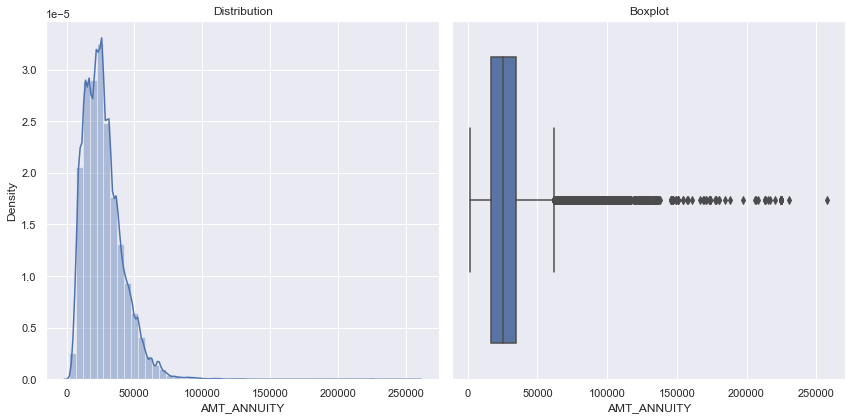

In [16]:
num_analyze(inp0.AMT_ANNUITY)

As shown in the summary statistics and the boxplot, AMT_ANNUITY column is having outliers, there is a huge difference between max and 75 percentile values. In this case It is better to fill missing values with median since outliers does not affect median.

In [17]:
inp0.AMT_ANNUITY.fillna(inp0.AMT_ANNUITY.median(),inplace=True)

count          307232.00
mean           538397.14
std            369446.70
min             40500.00
25%            238500.00
50%            450000.00
75%            679500.00
max           4050000.00
null count        276.00
dtype: float64


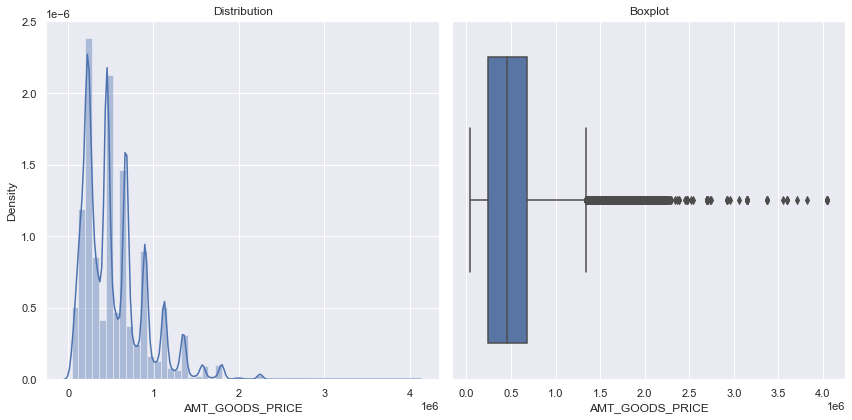

In [18]:
num_analyze(inp0.AMT_GOODS_PRICE)

Seems like AMT_GOODS_PRICE is also having some outliers, imputing missing values with median.

In [19]:
inp0.AMT_GOODS_PRICE.fillna(inp0.AMT_GOODS_PRICE.median(),inplace=True)

count         306849.00
mean               0.51
std                0.19
min                0.00
25%                0.39
50%                0.57
75%                0.66
max                0.85
null count       659.00
dtype: float64


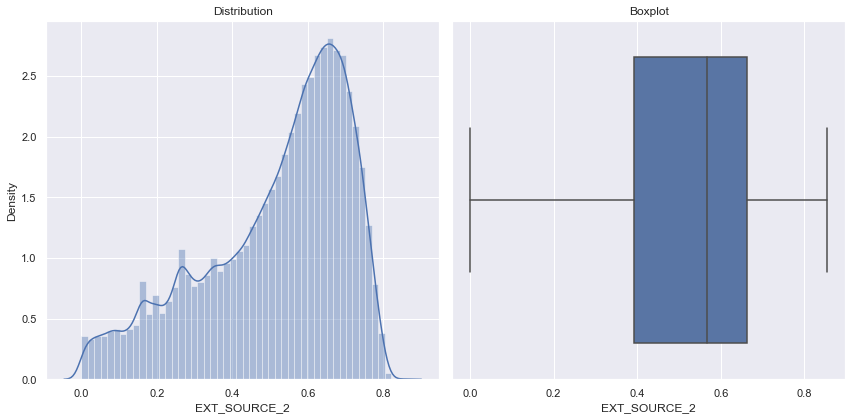

In [20]:
num_analyze(inp0.EXT_SOURCE_2)

It seems like values for EXT_SOURCE_2 column do not have outliers, therefore filling the missing values using mean in this case.

In [21]:
inp0.EXT_SOURCE_2.fillna(inp0.EXT_SOURCE_2.mean(),inplace=True)

count         246545.00
mean               0.51
std                0.19
min                0.00
25%                0.37
50%                0.54
75%                0.67
max                0.90
null count     60963.00
dtype: float64


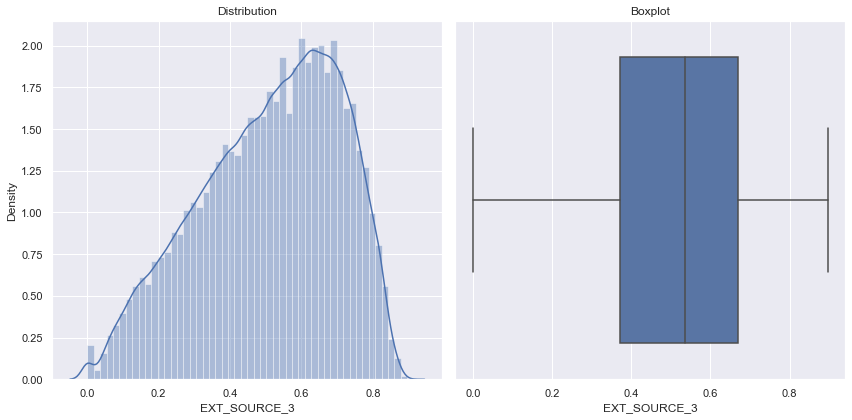

In [22]:
num_analyze(inp0.EXT_SOURCE_3)

Following the same for EXT_SOURCE_3 column:

In [23]:
inp0.EXT_SOURCE_3.fillna(inp0.EXT_SOURCE_3.mean(),inplace=True)

In [24]:
inp0.NAME_TYPE_SUITE.isnull().sum()

1290

In [25]:
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248525
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [26]:
inp0.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

As shown above missing values percentage is very less for NAME_TYPE_SUITE, therefore imputing missing values using 'mode' or 'most frequent category'

In [27]:
inp0.NAME_TYPE_SUITE.fillna(inp0.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [28]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306487.000000
mean          1.422246
std           2.400997
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

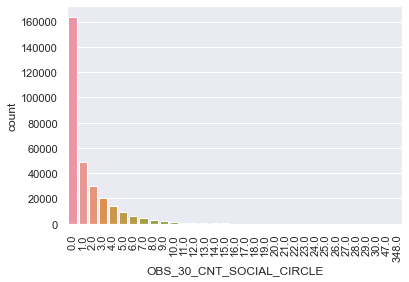

In [29]:
sns.countplot(inp0.OBS_30_CNT_SOCIAL_CIRCLE)
plt.xticks(rotation=90)
plt.show()

In [30]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306487.000000
mean          0.143422
std           0.446700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

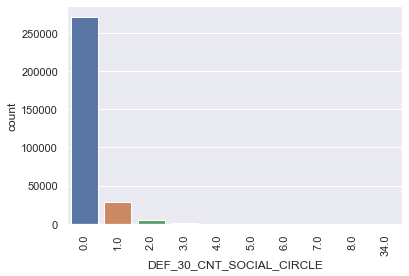

In [31]:
sns.countplot(inp0.DEF_30_CNT_SOCIAL_CIRCLE)
plt.xticks(rotation=90)
plt.show()

In [32]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306487.000000
mean          1.405293
std           2.379812
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

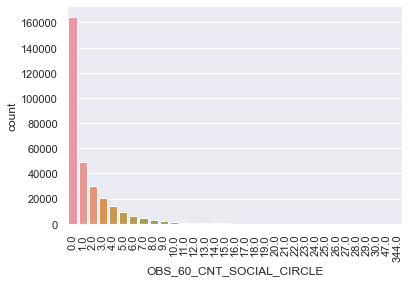

In [33]:
sns.countplot(inp0.OBS_60_CNT_SOCIAL_CIRCLE)
plt.xticks(rotation=90)
plt.show()

In [34]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306487.000000
mean          0.100050
std           0.362292
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

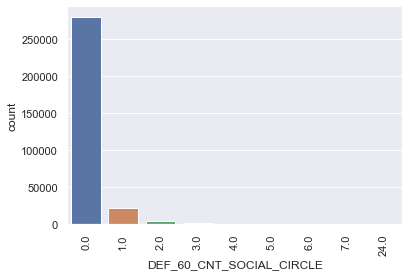

In [35]:
sns.countplot(inp0.DEF_60_CNT_SOCIAL_CIRCLE)
plt.xticks(rotation=90)
plt.show()

Since these columns are discrete variables, therefore imputing missing values using mode, 'mean' cannot be used in this case. 

In [36]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.fillna(inp0.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)
inp0.DEF_30_CNT_SOCIAL_CIRCLE.fillna(inp0.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)
inp0.OBS_60_CNT_SOCIAL_CIRCLE.fillna(inp0.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)
inp0.DEF_60_CNT_SOCIAL_CIRCLE.fillna(inp0.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

Changing the data type of these variables into 'int64'

In [37]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE = inp0.OBS_30_CNT_SOCIAL_CIRCLE.astype('int64')
inp0.DEF_30_CNT_SOCIAL_CIRCLE = inp0.DEF_30_CNT_SOCIAL_CIRCLE.astype('int64')
inp0.OBS_60_CNT_SOCIAL_CIRCLE = inp0.OBS_60_CNT_SOCIAL_CIRCLE.astype('int64')
inp0.DEF_60_CNT_SOCIAL_CIRCLE = inp0.DEF_60_CNT_SOCIAL_CIRCLE.astype('int64')

In [38]:
amt_req_col = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [39]:
for i in amt_req_col:
    print(inp0[i].describe(), '\n')

count    265991.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64 

count    265991.000000
mean          0.007000
std           0.110758
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64 

count    265991.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64 

count    265991.000000
mean          0.267396
std           0.916004
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64 

count    265991.000000
mean          0.265475
std           0.

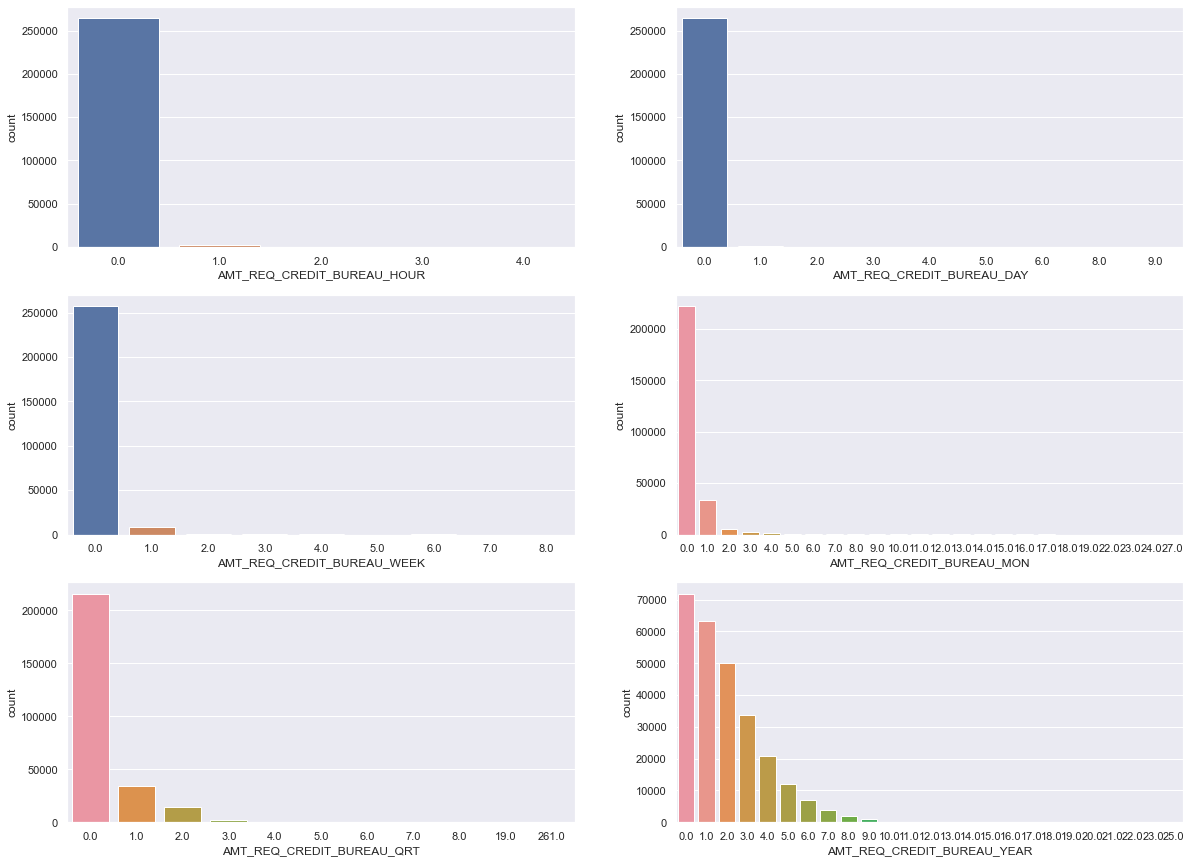

In [40]:
fig, axes = plt.subplots(3,2, figsize=(20,15))

for i, ax in zip(range(len(amt_req_col)), axes.flat):
    sns.countplot(inp0[amt_req_col[i]], ax=ax)

plt.show()

As you can see, mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. So, we can ignore these columns for analysis.

- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON

- As you can see that the values are only integers, either 0,1,2 or something else. If we will replace, we will replace by mode value and not mean value or median value because it will give an decimal value.

- Therefore imputing missing values with mode because these columns are also of discrete data type

In [41]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(inp0.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0], inplace=True)
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(inp0.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace=True)

Changing the data type into 'int64';

In [42]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT = inp0.AMT_REQ_CREDIT_BUREAU_QRT.astype('int64')
inp0.AMT_REQ_CREDIT_BUREAU_YEAR = inp0.AMT_REQ_CREDIT_BUREAU_YEAR.astype('int64')

In [43]:
round(inp0.OCCUPATION_TYPE.isnull().sum() / inp0.shape[0] * 100,2)

31.35

As you can see that this column has considerable perentage of missing values, that is 31%. Since it is a categorrical column, we can only replace it with mode value. But, replacing all of these 31% missing values with "Laborers" class will not be fair. So, we will leave it as it is and will not do any missing value treatment here.

In [44]:
inp0.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

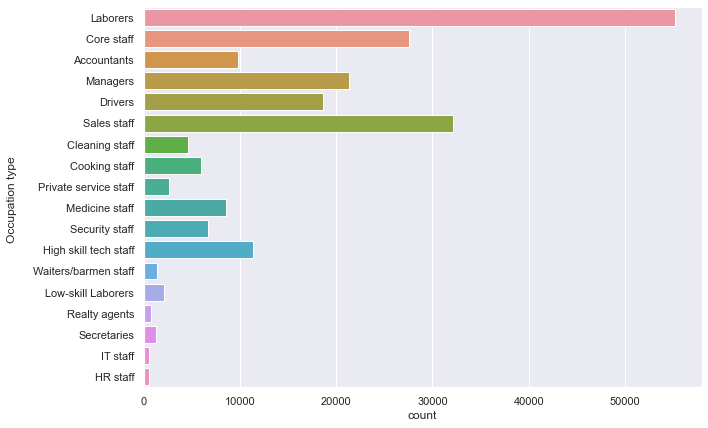

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(y = 'OCCUPATION_TYPE', data = inp0)
plt.ylabel('Occupation type \n')
plt.show()

In [46]:
inp0.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

This column has represents the clients birth in number of days relative to the application. So, we are converting into year for conciseness and better understanding. As the days are given as negative values, I have used abs() to convert it into positive values. I will do the same transformation for other dates.

In [47]:
inp0['CLIENT_AGE'] = (inp0.DAYS_BIRTH.abs() // 365.25).astype('int64')
inp0['YEAR_EMPLOYED'] = (inp0.DAYS_EMPLOYED.abs() // 365.25).astype('int64')
inp0['YEAR_REGISTRATION'] = (inp0.DAYS_REGISTRATION.abs() // 365.25).astype('int64')
inp0['YEAR_ID_PUBLISH'] = (inp0.DAYS_ID_PUBLISH.abs() // 365.25).astype('int64')
inp0['YEAR_LAST_PHONE_CHANGE'] = (inp0.DAYS_LAST_PHONE_CHANGE.abs() // 365.25).astype('int64')

In [48]:
inp0.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'], axis = 1, inplace=True)

In [49]:
inp0.CODE_GENDER.value_counts()

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

Replacing XNA data with 'F' since 'F' is the most frequent data in this variable

In [50]:
inp0.CODE_GENDER= inp0.CODE_GENDER.replace("XNA", "F")

In [51]:
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Following the same for ORGANIZATION_TYPE varible

In [52]:
inp0.ORGANIZATION_TYPE = inp0.ORGANIZATION_TYPE.replace("XNA", "Unknown")

In [53]:
inp0.CNT_FAM_MEMBERS = inp0.CNT_FAM_MEMBERS.astype('int64')

In [54]:
inp0.CNT_CHILDREN.describe()

count    307508.000000
mean          0.417056
std           0.722124
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

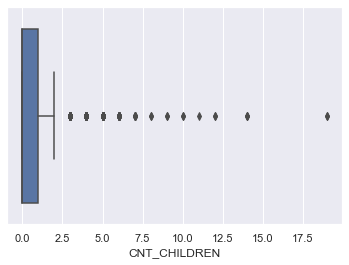

In [55]:
sns.boxplot(inp0.CNT_CHILDREN)
plt.show()

Seems like CNT_CHILDREN columns is having outliers since 19 is max value in children count and is not usual. As of now, I am not removing or capping outliers.

In [134]:
#printng summary statistics for numerical columns;

num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

for i in num_cols:
    print(round(inp0[i].describe()),'\n')

count       307508.0
mean        168797.0
std         237124.0
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64 

count     307508.0
mean      599027.0
std       402492.0
min        45000.0
25%       270000.0
50%       513531.0
75%       808650.0
max      4050000.0
Name: AMT_CREDIT, dtype: float64 

count    307508.0
mean      27108.0
std       14494.0
min        1616.0
25%       16524.0
50%       24903.0
75%       34596.0
max      258026.0
Name: AMT_ANNUITY, dtype: float64 

count     307508.0
mean      538318.0
std       369290.0
min        40500.0
25%       238500.0
50%       450000.0
75%       679500.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64 



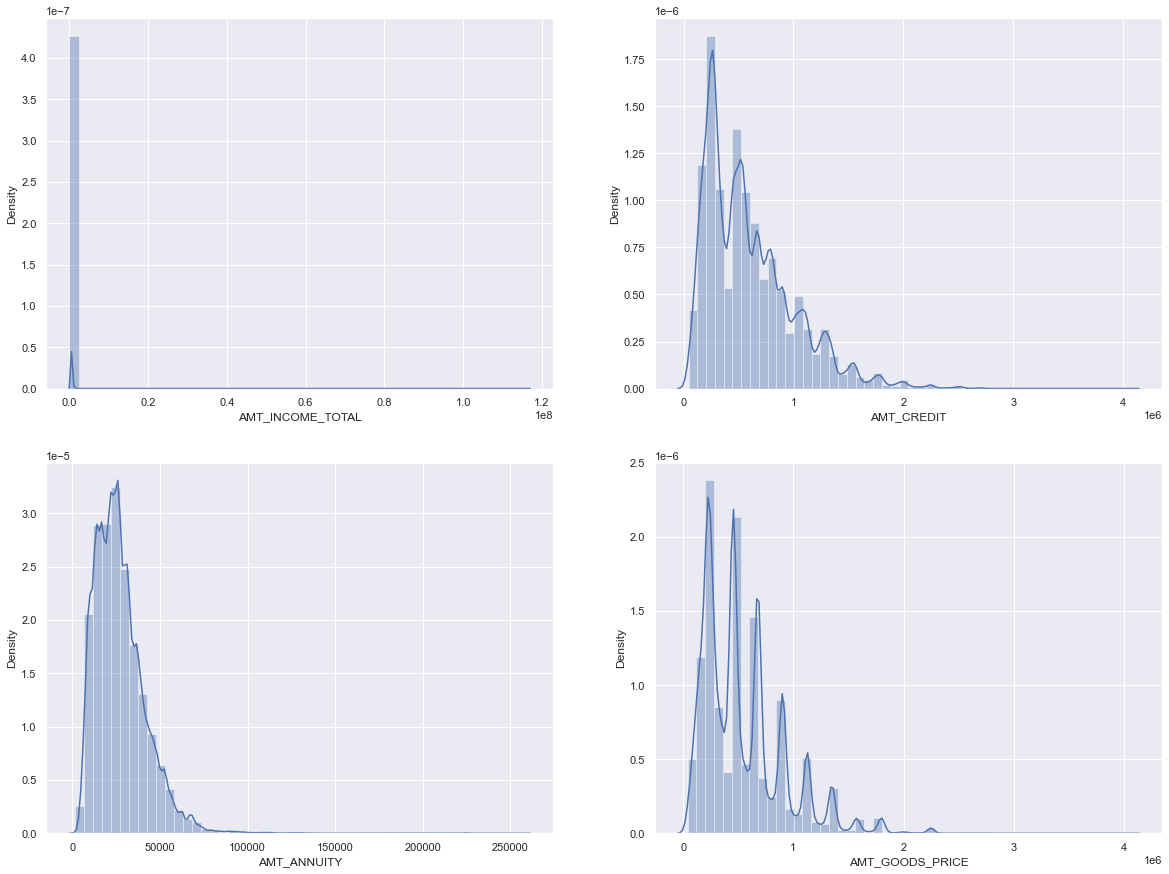

In [57]:
fig, axes = plt.subplots(2,2, figsize=(20,15))

for i, ax in zip(range(len(num_cols)), axes.flat):
    sns.distplot(inp0[num_cols[i]], ax=ax)
plt.show()

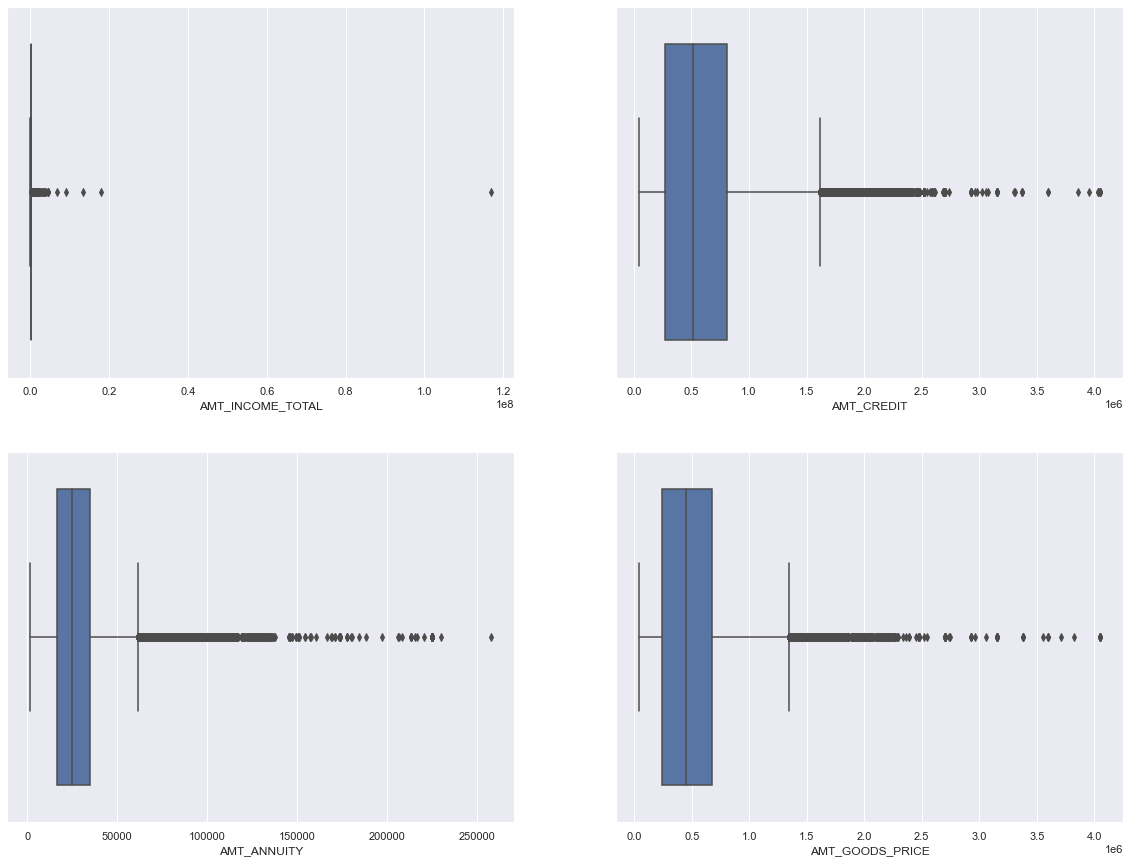

In [58]:
fig, axes = plt.subplots(2,2, figsize=(20,15))

for i, ax in zip(range(len(num_cols)), axes.flat):
    sns.boxplot(inp0[num_cols[i]], ax=ax)

plt.show()

 Binning the AMT_INCOME_TOTAL, AMT_ANNUITY and AMT_GOODS based on quantiles

In [59]:
inp0['INCOME_RANGE'] = pd.qcut(inp0.AMT_INCOME_TOTAL, q=[0,0.2,0.5,0.8,0.95,1], labels=['Very Low', 'Low','Medium','High','Very High'])              ##creating a new column income range by grouping the income
inp0['AMT_ANNUITY_RANGE'] = pd.qcut(inp0['AMT_ANNUITY'], q=[0,.25,.75,1], labels=['Low','Average','High'])
inp0['AMT_GOODS_RANGE'] = pd.qcut(inp0['AMT_GOODS_PRICE'], q=[0,.25,.75,1], labels=['Low','Average','High'])

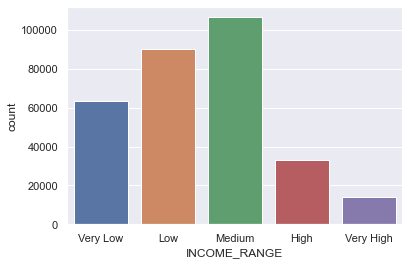

In [60]:
sns.countplot(inp0.INCOME_RANGE)
plt.show()

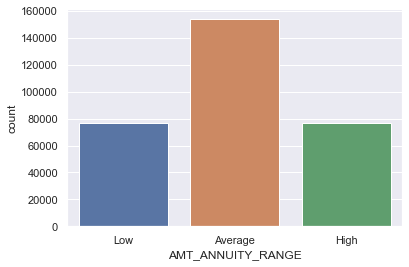

In [61]:
sns.countplot(inp0.AMT_ANNUITY_RANGE)
plt.show()

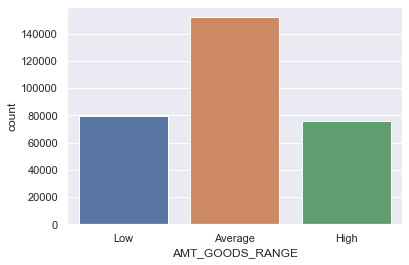

In [62]:
sns.countplot(inp0.AMT_GOODS_RANGE)
plt.show()

In [63]:
inp0.CLIENT_AGE.describe()

count    307508.000000
mean         43.405264
std          11.945756
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: CLIENT_AGE, dtype: float64

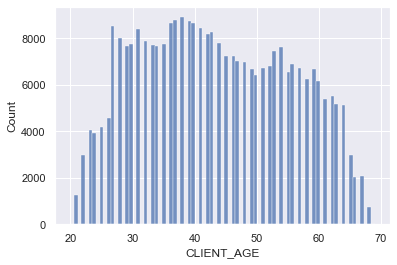

In [64]:
sns.histplot(inp0.CLIENT_AGE)
plt.show()

Binning the AGE variable based on quantiles

In [65]:
inp0['AGE_RANGE'] = pd.cut(inp0.CLIENT_AGE, bins=[20,30,40,50,60,70], labels=['20-29', '30-39','40-49','50-59','60+'] ) #creating a new column age range by grouping the age

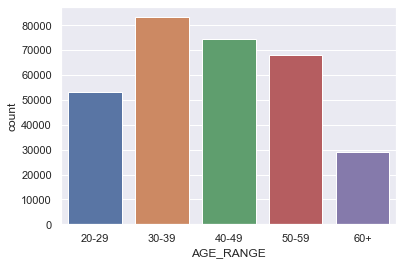

In [66]:
sns.countplot(inp0.AGE_RANGE)
plt.show()

Dropping columns which I feel unnecessary or irrelevant variables for further analysis.

In [67]:
drop_columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

inp0.drop(labels=drop_columns,axis=1,inplace=True)

In [68]:
inp0.to_csv('application_cleaned.csv')

In [69]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,YEAR_LAST_PHONE_CHANGE,INCOME_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Laborers,1,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,0,1,25,1,9,5,3,Medium,Average,Average,20-29
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510852,1,0,1,0,0,0,45,3,3,0,2,High,High,High,40-49
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Laborers,1,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,52,0,11,6,2,Very Low,Low,Low,50-59
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,Laborers,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510852,2,0,2,0,0,0,52,8,26,6,1,Low,Average,Average,50-59
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,Core staff,1,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510852,0,0,0,0,0,0,54,8,11,9,3,Low,Average,Average,50-59


### Data Imbalance in TARGET Variable

In [70]:
inp0.TARGET.value_counts()

0    282683
1     24825
Name: TARGET, dtype: int64

In [71]:
target = round(inp0.TARGET.value_counts(normalize=True)*100)
target

0    92.0
1     8.0
Name: TARGET, dtype: float64

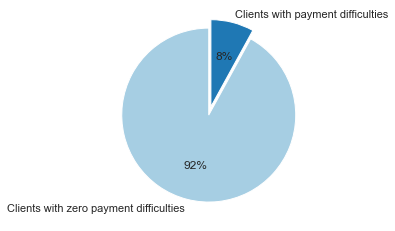

In [72]:
colors = sns.color_palette('Paired')
plt.pie(target, labels=['Clients with zero payment difficulties', 'Clients with payment difficulties'], colors = colors, autopct='%.0f%%', startangle=90, explode=(0,0.1))
plt.show()

#### Segmenting the dataframe into two parts

Since due to data imbalance, we will separate out the train with a target equal to 0 and train with a target equal to 1. And we will analyse them individually and try to find any relationship if it exists.

In [73]:
target0 = inp0[inp0.TARGET == 0]
target1 = inp0[inp0.TARGET == 1]

#### Ratio

In [74]:
round(len(target0) / len(target1),1)

11.4

### Segmented Univariate Analysis

In [75]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282683 entries, 1 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   282683 non-null  int64   
 1   TARGET                       282683 non-null  int64   
 2   NAME_CONTRACT_TYPE           282683 non-null  object  
 3   CODE_GENDER                  282683 non-null  object  
 4   FLAG_OWN_CAR                 282683 non-null  object  
 5   FLAG_OWN_REALTY              282683 non-null  object  
 6   CNT_CHILDREN                 282683 non-null  int64   
 7   AMT_INCOME_TOTAL             282683 non-null  float64 
 8   AMT_CREDIT                   282683 non-null  float64 
 9   AMT_ANNUITY                  282683 non-null  float64 
 10  AMT_GOODS_PRICE              282683 non-null  float64 
 11  NAME_TYPE_SUITE              282683 non-null  object  
 12  NAME_INCOME_TYPE             282683 non-null

##### Creating a helper function to visualize categorical features

In [76]:
def count_plot(series):
    series=series
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title("Clients with zero payment difficulties")
    sns.countplot(data = target0, x = series, order = target0[series].value_counts().index)
    plt.xlabel(series)
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    plt.title("Clients with payment difficulties")
    sns.countplot(data = target1, x  = series,order = target1[series].value_counts().index)
    plt.xlabel(series)
    plt.xticks(rotation=90)
    plt.show()

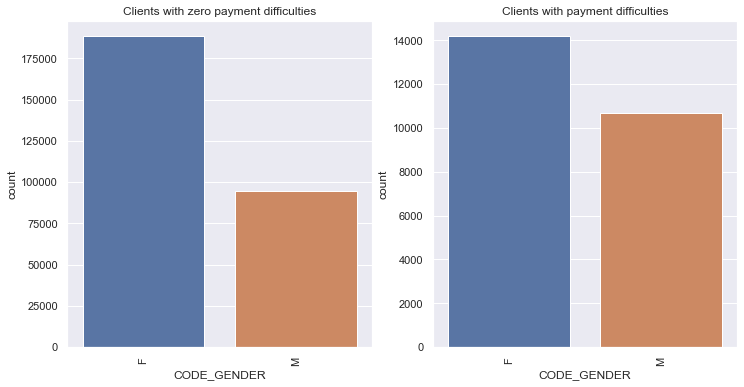

In [77]:
count_plot('CODE_GENDER')

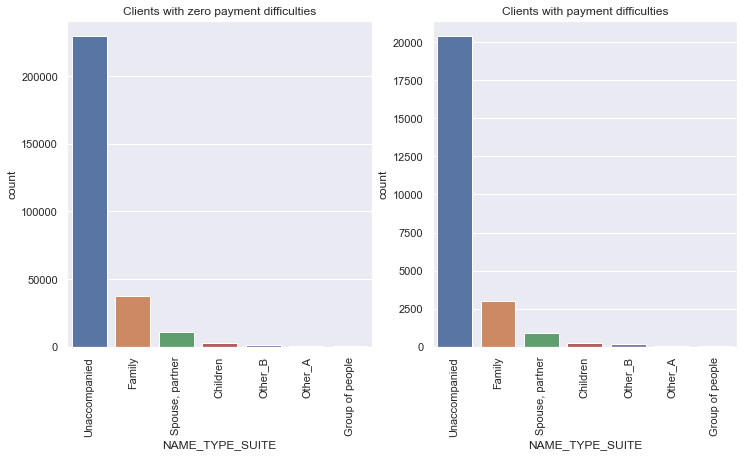

In [78]:
count_plot('NAME_TYPE_SUITE')

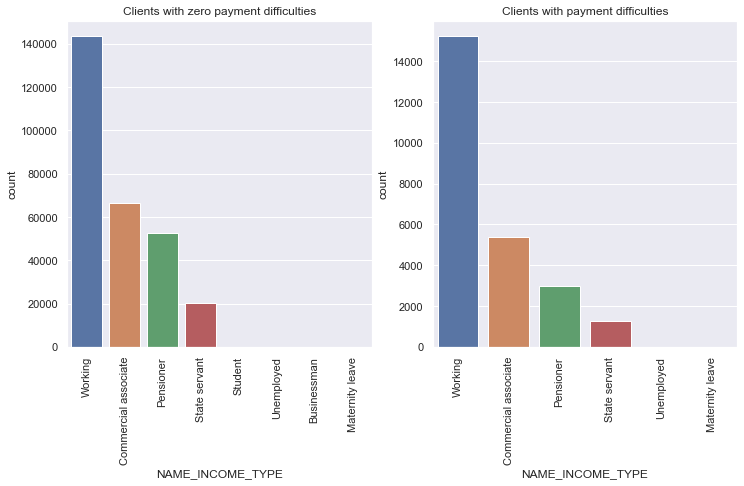

In [79]:
count_plot('NAME_INCOME_TYPE')

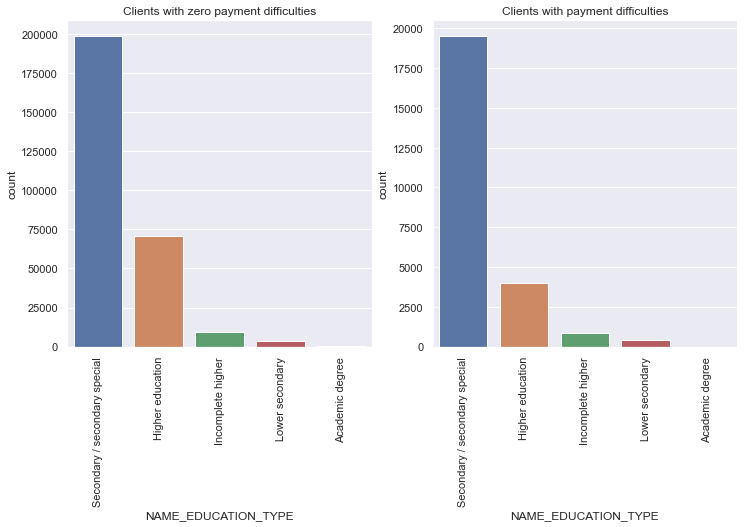

In [80]:
count_plot('NAME_EDUCATION_TYPE')

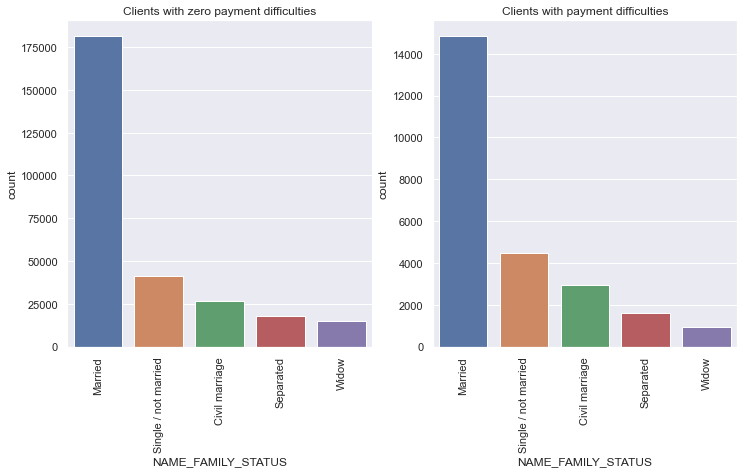

In [81]:
count_plot('NAME_FAMILY_STATUS')

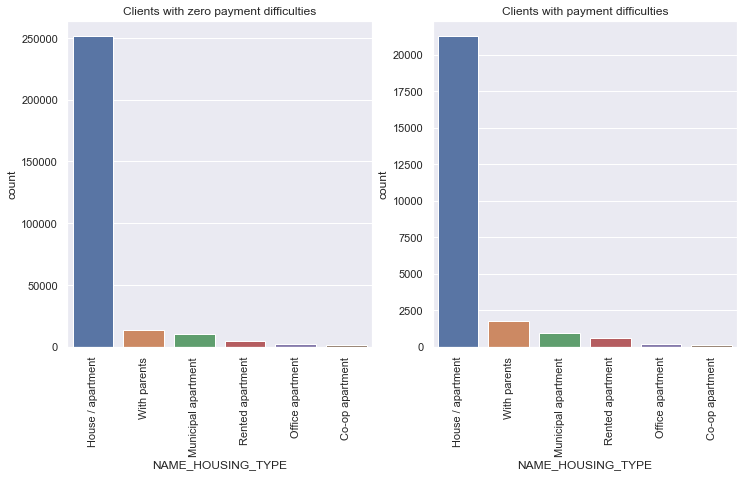

In [82]:
count_plot('NAME_HOUSING_TYPE')

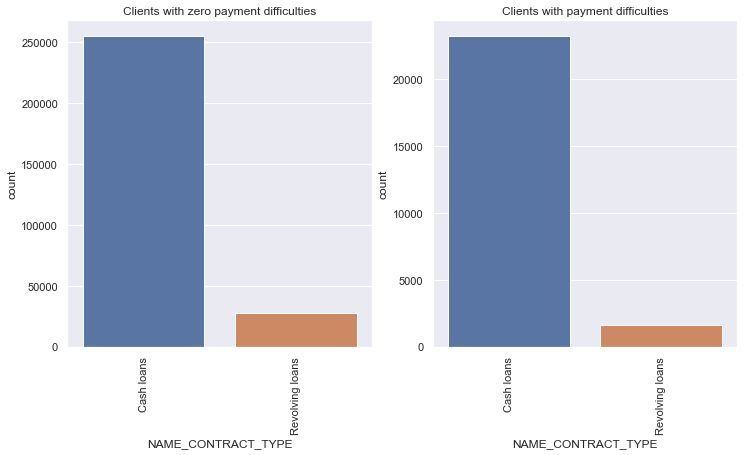

In [83]:
count_plot('NAME_CONTRACT_TYPE')

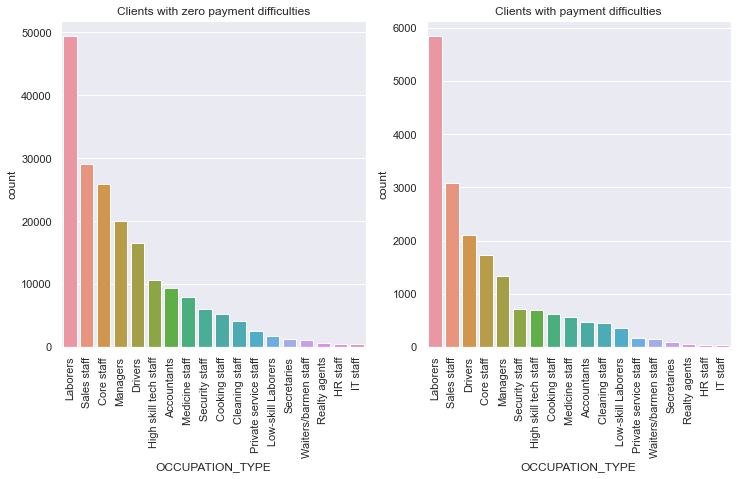

In [84]:
count_plot('OCCUPATION_TYPE')

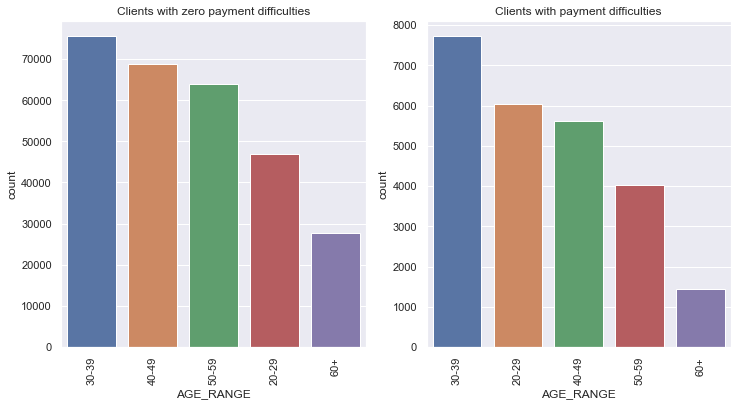

In [85]:
count_plot('AGE_RANGE')

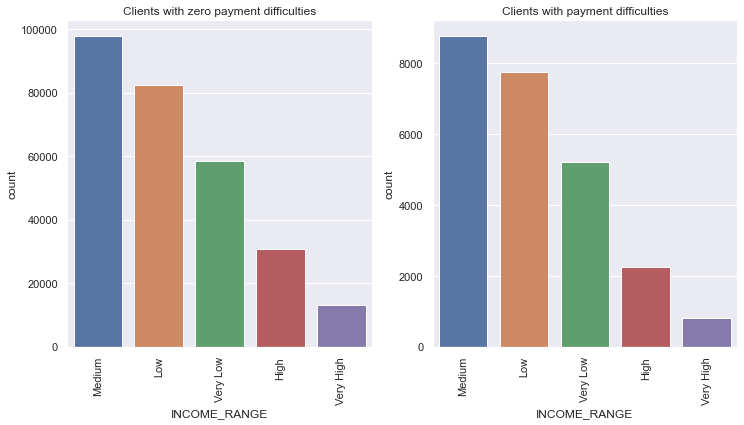

In [86]:
count_plot('INCOME_RANGE')

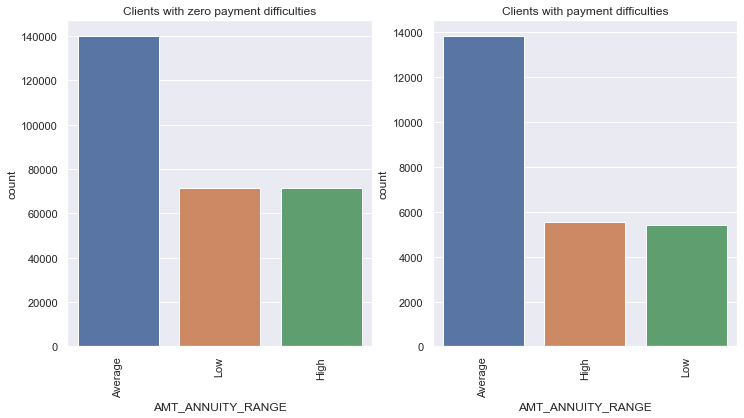

In [87]:
count_plot('AMT_ANNUITY_RANGE')

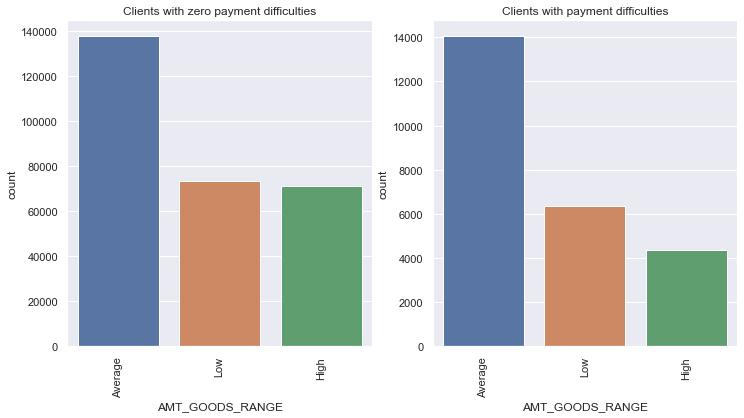

In [88]:
count_plot('AMT_GOODS_RANGE')

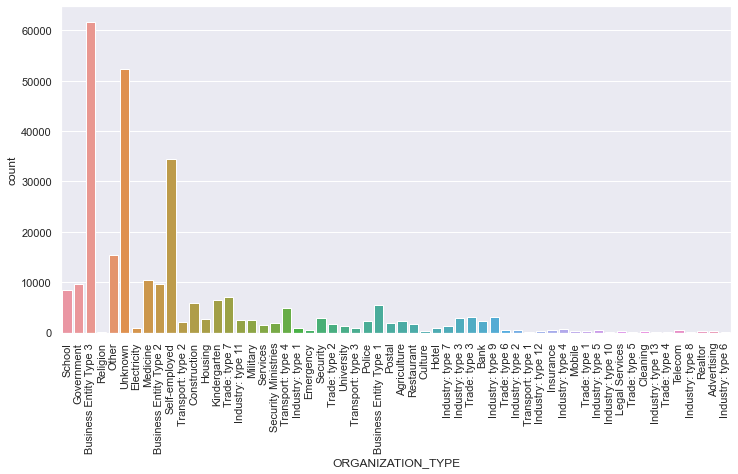

In [89]:
plt.figure(figsize=(12,6))
sns.countplot(target0.ORGANIZATION_TYPE)
plt.xticks(rotation=90)
plt.show()

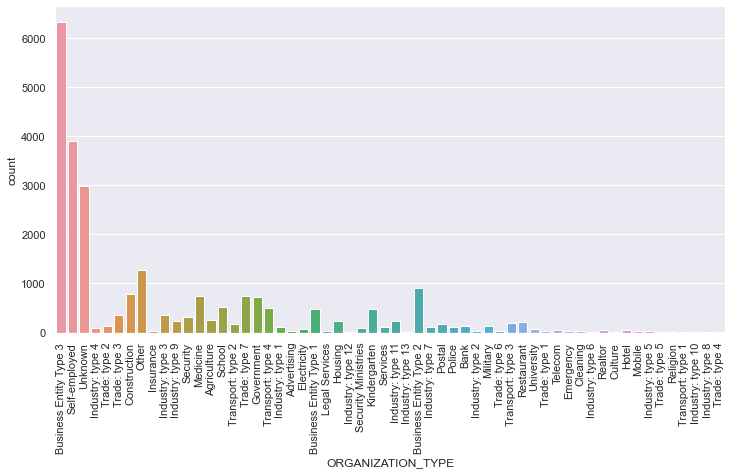

In [90]:
plt.figure(figsize=(12,6))
sns.countplot(target1.ORGANIZATION_TYPE)
plt.xticks(rotation=90)
plt.show()

The variable which seems to be important are:

- CODE_GENDER: Less number of males(hist plot) take loan but the defaulters are higher in case of males(dist plot).
- NAME_INCOME_TYPE: Pensioner defaulter is lower than non-defaulter.
- NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the defualt rate in secondary education is much high and for higher education is much low.
- NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.
- OCCUPATION_TYPE: Laborers and different categories of staffs mostly take the loan, but the managers and the high skilled tech staffs are most relaible.

#### Numerical Columns

In [91]:
num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CLIENT_AGE']

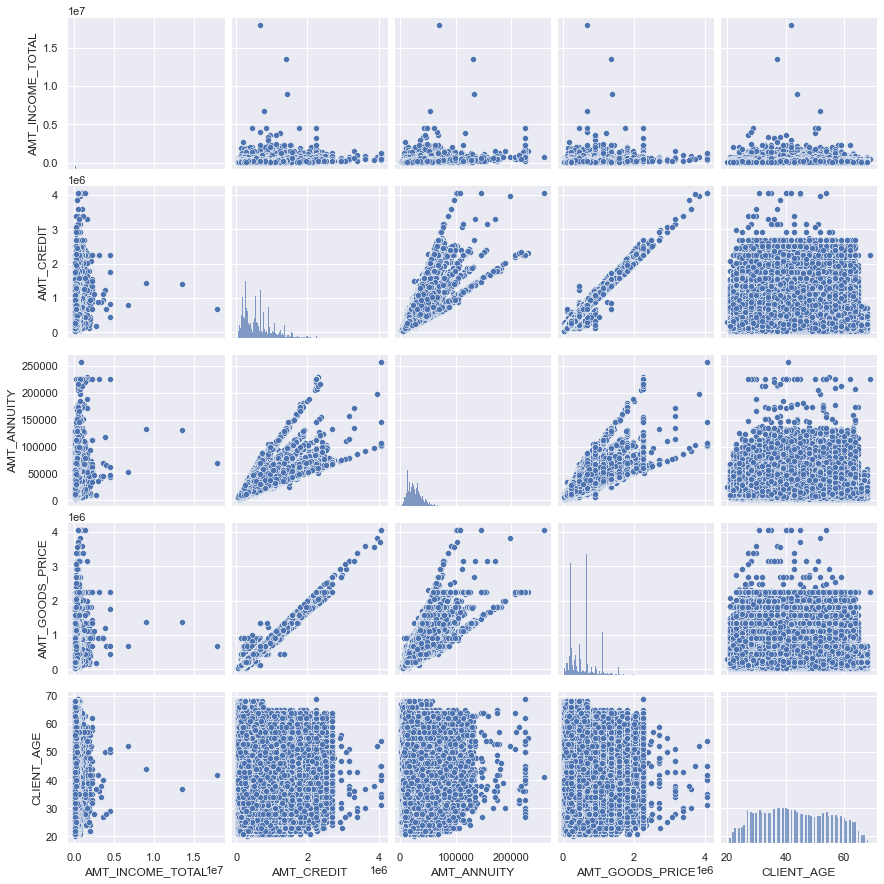

In [92]:
sns.pairplot(target0[num_cols])
plt.show()

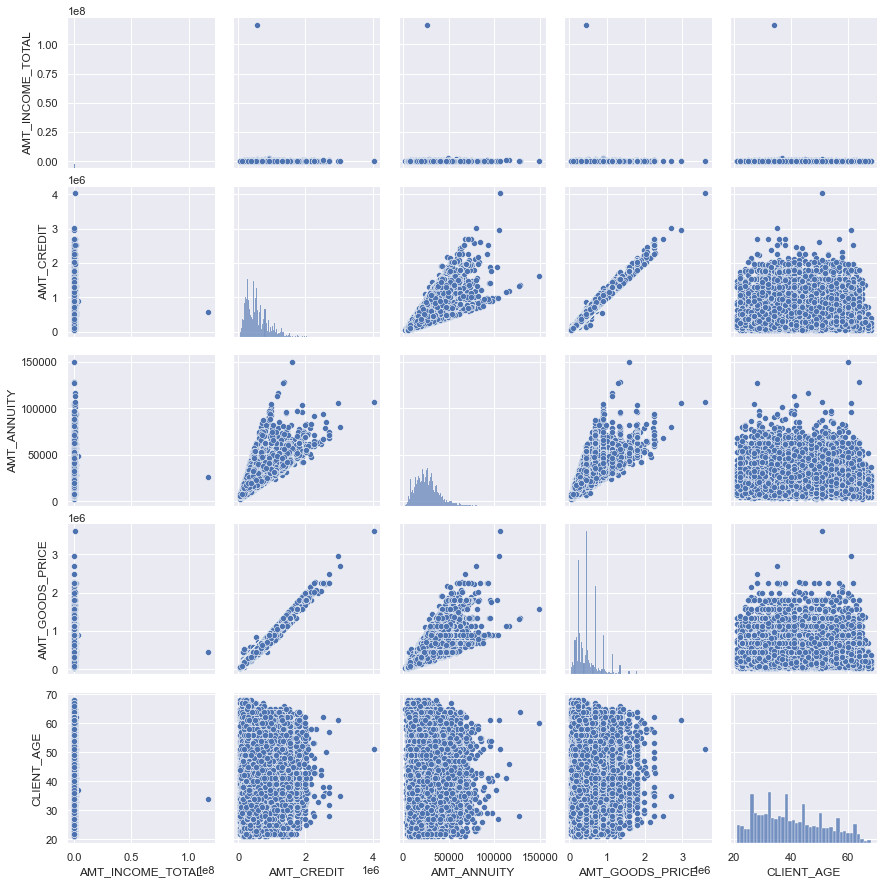

In [93]:
sns.pairplot(target1[num_cols])
plt.show()

Creating pivot table to check percentage of risk w. r. t. target variable

In [94]:
pd.pivot_table(inp0, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

NAME_EDUCATION_TYPE       Academic degree  Higher education  Incomplete higher  Lower secondary  Secondary / secondary special
CODE_GENDER INCOME_RANGE                                                                                                      
F           Very Low             0.000000          0.056068           0.086399         0.080193                       0.076778
            Low                  0.000000          0.049022           0.080075         0.113889                       0.079523
            Medium               0.000000          0.050257           0.078431         0.096983                       0.075692
            High                 0.105263          0.041516           0.074313         0.038961                       0.070736
            Very High            0.076923          0.037289           0.082251         0.066667                       0.065930
M           Very Low             0.000000          0.080411           0.123967         0.125000                       0.118066
            Low                  0.000000          0.073305           0.097887         0.142857                       0.123693
            Medium               0.000000          0.070086           0.095130         0.150515                       0.113466
            High                 0.000000          0.055911           0.074627         0.081633                       0.093484
            Very High            0.000000          0.044080           0.077586         0.066667                       0.089939

In [95]:
num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CLIENT_AGE','CNT_CHILDREN','CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3','YEAR_EMPLOYED','YEAR_REGISTRATION','YEAR_ID_PUBLISH','YEAR_LAST_PHONE_CHANGE']

### Correlation matrix for Clients with zero payment difficulties

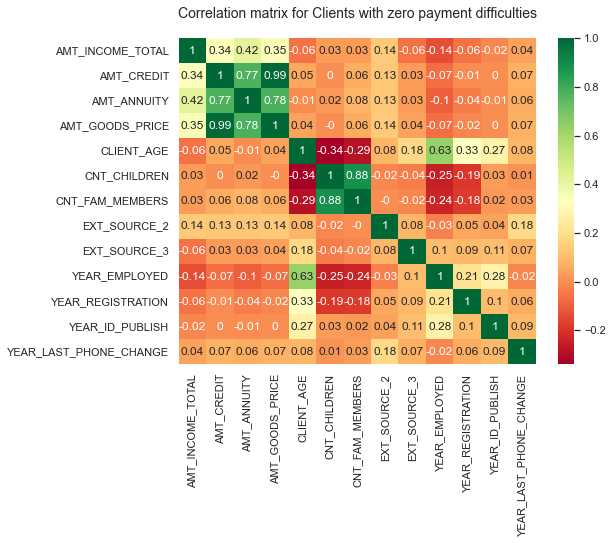

In [96]:
plt.figure(figsize=(8,6))
heat0 = round(target0[num_cols].corr(method='pearson'),2)
sns.heatmap(heat0, annot=True, cmap="RdYlGn")
plt.title("Correlation matrix for Clients with zero payment difficulties", fontsize=14,pad=20)
plt.show()

### Correlation matrix for Clients with payment difficulties

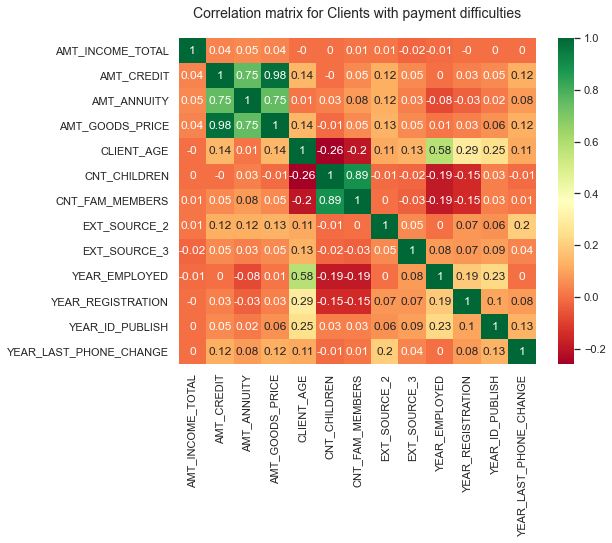

In [97]:
plt.figure(figsize=(8,6))
heat0 = round(target1[num_cols].corr(method='pearson'),2)
sns.heatmap(heat0, annot=True, cmap="RdYlGn")
plt.title("Correlation matrix for Clients with payment difficulties", fontsize=14,pad=20)
plt.show()

- AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE columns having highest correlation.
- CLIENT_AGE & YEARS_EMPLOYED also having some correlation
- CNT_Children & CNT_FAM_MEMBERS are also correlated which is very obvious.

### Reading previous application

In [98]:
inp1 = pd.read_csv(r"C:\Users\Asus\Desktop\IIIT-B\Credit EDA Case Study\Dataset\previous_application.csv")
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
inp1.shape

(1670214, 37)

In [100]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [101]:
inp1.SK_ID_PREV.value_counts()

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [102]:
inp1.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

#### As you can see above, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV

In [103]:
na_val = (inp1.isnull().sum() / inp1.shape[0] * 100).sort_values(ascending=False)
na_val

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

Dropping columns which has missing values equal to or more than 40%.

In [104]:
inp1 = inp1.loc[:, na_val <= 40].copy()

In [105]:
inp1.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [124]:
inp1.to_csv('previous_app_cleaned.csv')

#### Let's merge dataframe: train and previous application based on SK_ID_PREV
After merging both the dataframes, the new dataframe will also have duplicate number of SK_ID_PREV. This should not be a problem, as we are trying to figure out if any pattern is present by including the cases if a lender has previously taken loan more than once.

In [106]:
df_merged = inp0.merge(inp1, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [107]:
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,YEAR_LAST_PHONE_CHANGE,INCOME_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Laborers,1,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,0,1,25,1,9,5,3,Medium,Average,Average,20-29,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510852,1,0,1,0,0,0,45,3,3,0,2,High,High,High,40-49,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510852,1,0,1,0,0,0,45,3,3,0,2,High,High,High,40-49,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510852,1,0,1,0,0,0,45,3,3,0,2,High,High,High,40-49,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Laborers,1,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,52,0,11,6,2,Very Low,Low,Low,50-59,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [108]:
inp1.shape

(1670214, 26)

In [109]:
df_merged.shape

(1413701, 70)

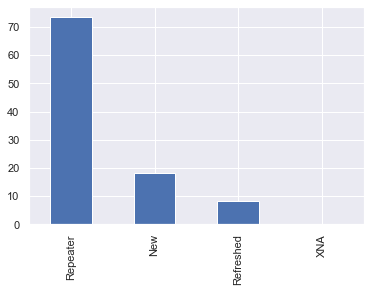

In [111]:
(df_merged.NAME_CLIENT_TYPE.value_counts() /df_merged.shape[0] *100).plot.bar()
plt.show()

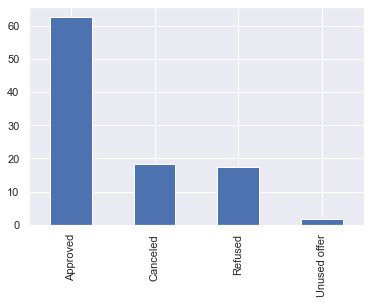

In [113]:
(df_merged.NAME_CONTRACT_STATUS.value_counts() / df_merged.shape[0] * 100).plot.bar()
plt.show()

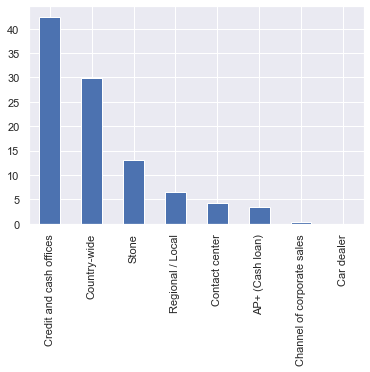

In [119]:
(df_merged.CHANNEL_TYPE.value_counts() / df_merged.shape[0] * 100).plot.bar()
plt.show()

##### I have done further analysis using Tableau. THANK YOU!